## Chapter 4. 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수에 대해 알아보자!

#### Machine Learning과 학습
- 기계학습에서는 사람의 개입을 최소화하고 수집한 '데이터'로부터 '패턴'을 찾으려 시도한다.
- 따라서, 데이터로부터 '특징(feature)'을 추출하고 그 특징의 패턴을 기계학습 기술로 학습시키게 된다.
- BUT! 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당하더라도, 데이터에 대해 '중요한 특징'이 무엇인지 생각하고, 구성하는 것은 '사람'의 몫이다.

#### Neural Network와 학습
- 신경망은 이미지를 '있는 그대로' 학습하고, 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다!
- 따라서, 딥러닝을 종단간 기계학습(end-to-end machine learning)이라고도 하는데, 이는 처음부터 끝까지, 즉, 데이터(입력)에서 결과(출력)까지 사람의 개입 없이 얻어낸다는 뜻을 가지고 있다.

### 4.2 손실함수
- 손실 함수(loss function): 신경망 학습에서 사용하는 지표
- 일반적으로 평균 제곱 오차(MSE)와 교차 엔트로피 오차를 사용한다.
- 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다.
- 즉, 손실 함수 값에 마이너스를 곱하면 '얼마나 좋은지'에 대한 지표로 사용할 수 있다.

#### 4.2.1 평균 제곱 오차(Mean Squared Error, MSE)

$ E = {1 \over 2} \sum\limits_k(y_k - t_k)^2 $

- $y_k$: 신경망의 출력값(예측값)
- $t_k$: 정답 레이블(실제 정답값)
- $k$: 데이터의 수(data point 수)

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2) # y, t는 넘파이 배열

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정
print(mean_squared_error(np.array(y), np.array(t))) # 오차가 더 작은 쪽이 정답에 더 가까움!

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정
print(mean_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


#### 4.2.2 교차 엔트로피 오차(Cross Entropy Error, CEE)

$ E = - \sum\limits_k t_k \log y_k $

- $\log$: 밑이 $e$인 자연로그($log_e$)
- $y_k$: 신경망의 출력값(예측값)
- $t_k$: 실제 정답값
- 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (one-hot encoding)이기 때문에, 정답에 해당하는 인덱스의 신경망 출력값에 대해 교차 엔트로피 오차를 계산한 값이 된다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

C:\Users\minji\AppData\Local\Temp/ipykernel_29664/3250564785.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


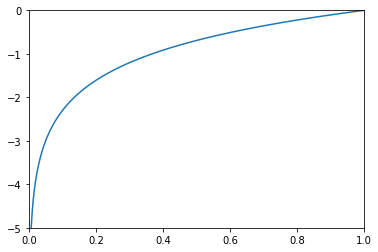

In [4]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.xlim(0.0, 1.0)
plt.ylim(-5, 0)
plt.show()

- 정답일 때의 출력이(즉, $y_k$) 1일수록 (softmax 함수의 출력값=1) 오차는 작아진다.
- 정답일 때의 출력값이 작아질수록(0에 가까워질수록) 오차는 커진다.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) # y=0이면 log 0은 마이너스 무한대가 되어버리므로, 아주 작은 delta 값을 더해서 0이 되지 않도록 한다.

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정
print(cross_entropy_error(np.array(y), np.array(t))) # 오차가 더 작은 쪽이 정답에 더 가까움!
# 정답 인덱스에 대한 출력값 = 0.6
# 즉, -2*log0.6

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정
print(cross_entropy_error(np.array(y2), np.array(t)))
# 정답 인덱스에 대한 출력값 = 0.1
# 즉, -2*log0.1

0.510825457099338
2.302584092994546


#### 4.2.3 미니배치 학습
- 지금까지는 데이터 하나에 대한 손실 함수
- 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법은?

$ E = - {1 \over N} \sum\limits_n \sum\limits_k t_{nk} \log y_{nk} $

- 데이터가 $N$개라면, $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미
- 데이터의 개수가 너무 많다면 손실함수의 합을 구하는 데 너무 오랜 시간이 걸리기 때문에, 훈련 데이터 일부만을 골라 학습을 수행할 수 있다.
- 이 일부 데이터를 미니배치(mini-batch)라고 한다.
- 예를 들어, 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 학습시키는 것을 미니배치 학습이라고 한다.
- 즉, 전체 훈련 데이터의 대표로서 무작위로 선택한 미니배치를 사용하는 것이다.

In [7]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [8]:
# 훈련 데이터 60,000개에서 무작위로 10장만 빼내기

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train_size 미만의 수 중에서 batch_size개 만큼의 수를 무작위로 뽑아내기
x_batch = x_train[batch_mask]
t_batch = x_train[batch_mask]

In [9]:
np.random.choice(60000, 10)

array([44335, 36637,  3048, 46741, 10673, 48403, 28756, 15813, 32115,
       43393])

#### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [10]:
# 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [11]:
# 정답 레이블이 one-hot encoding이 아니라 '2', '7' 등의 숫자 레이블로 주어지는 경우

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

# 만약 데이터가 5개 주어졌다고 한다면, MNIST 데이터셋이라고 했을 때 y.size는 (5, 10), t.size는 (5, )
# y[np.arange(batch_size), t]에서 np.arange(batch_size)는 [0, 1, 2, 3, 4]가 되므로 이는 인덱스의 역할을 한다
# 즉, y에서 0번째 인덱스 데이터의 정답값(예: 7)에 대한 출력값을 가져와라, 1번째 인덱스 데이터의 정답값(예: 2)에 대한 출력값을 가져와라, ... 등
# 그런데 np.log(y)에 t를 안 곱해주나...?

#### 4.2.5 왜 손실 함수를 설정하는가?
- 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.  
(정확도: 전체 100개 데이터 중에서 32개가 맞았다 --> 32%의 정확도)
- 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.  
(즉, 정확도를 지표로 삼는다면 weight가 변하더라도 정확도는 그대로 32%에 머물러 있을 수 있다.)
- 이는 계단 함수를 활성화 함수로 사용하지 않는 이유와도 일맥상통하는데, 계단 함수를 이용하면 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여(계단 함수의 미분은 대부분의 장소에서 0이므로) 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문이다.
- 즉, sigmoid 함수와 같은 비선형 함수를 사용하는 이유도, 기울기가 0이 되지 않는 성질 덕분에 신경망이 올바르게(연속적으로) 학습할 수 있기 때문이다.

### 4.3 수치 미분
- 미분은 '특정 순간'의 변화량을 뜻한다.

$ {df(x) \over dx} = \lim\limits_{h\to0} {f(x+h)-f(x) \over h} $

- 결국, $x$의 '작은 변화'가 함수 $f(x)$를 얼마나 변화시키느냐를 의미한다.

In [12]:
# 나쁜 구현의 예

def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

문제점?
- <문제점1> 1e-50 이라는 값이 너무 작아 반올림 오차(rounding error) 문제가 생기게 된다.
- <개선1> 미세한 값 h로 $10^{-4}$ 사용해보기
- <문제점2> 위에서 구현한 것은 차분이다. 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.
- <개선2> 오차를 줄이기 위해, $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다. 이를 중심 차분, 혹은 중앙 차분이라고 한다.

In [13]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

다시 한 번 정리
- 해석적 미분: 수식을 전개하여 미분하는 것. 오차를 포함하지 않는 '진정한 미분값'을 구하는 방법
- 수치 미분(numerical differentiation): 아주 작은 차분으로 미분하는 것. 즉, '근사치'로 계산하는 방법

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

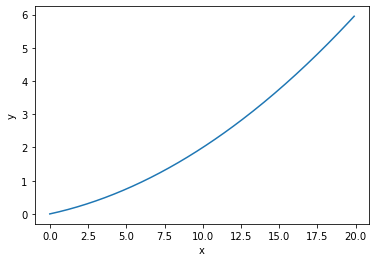

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [17]:
print(numerical_diff(function_1, 5)) # x=5에서의 기울기(근사값)
print(numerical_diff(function_1, 10)) # x=10에서의 기울기(근사값)

0.1999999999990898
0.2999999999986347


0.1999999999990898


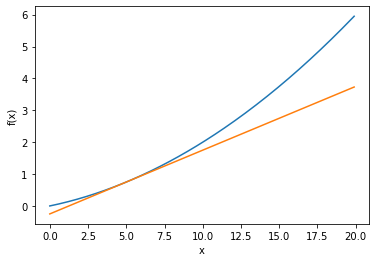

In [18]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

#### 4.3.3 편미분

$ f(x_0, x_1) = x_0^2 + x_1^2 $

- 편미분: 변수가 여럿인 함수에 대한 미분
- 편미분을 수식으로는 $ \frac{\partial f}{\partial x_0} $나 $ \frac{\partial f}{\partial x_1} $ 처럼 쓴다.
- 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

In [19]:
def function_2(x): # x는 넘파이 배열이라고 가정
    return x[0]**2 + x[1]**2 # 또는 return np.sum(x**2)

In [20]:
# 문제1: x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0 # x0에 대한 함수로 만들기

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
# 문제2: x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.

def function_tmp2(x1):
    return 3.0**2 + x1*x1 # x1에 대한 함수로 만들기

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 4.4 기울기